# Rudimentary analysis: Using the NLTK to do some simple "reading"

In this notebook, you will define a file for analysis, and the script will output interesting features & characteristics of the text. --Eric Lease Morgan

In [4]:
# configure; define some constants
CARREL   = 'shakespeare-sonnets'
TEMPLATE = './carrels/%s/etc/reader.txt'
LANGUAGE = 'english'
KEYWORD  = 'love'
KEYWORDS = [ 'love', 'war', 'man', 'woman', 'god' ]


In [5]:
# require
from nltk import *


In [6]:
# read the given file, tokenize it, normalize it, and create an NLTK "Text object" from the result
file   = TEMPLATE % CARREL
data   = open( file ).read()
tokens = word_tokenize( data )
tokens = [ token.lower() for token in tokens ] 
text   = Text( tokens )


In [7]:
text.collocations()

thou art; mine eye; thou wilt; ten times; thy self; dost thou; tongue-
tied; thou hast; thou dost; thou mayst; mine eyes; thou shalt; thine
eyes; to- morrow; thy sweet; thou know'st; housewife runs; unperfect
actor; unthrifty loveliness; thy beauty


In [8]:
# count
text.count( KEYWORD )

213

In [9]:
# compute relative weight percentage of a word (count/total words); to what degree is this word "significant"?
count      = text.count( KEYWORD )
total      = len( tokens )
percentage = 100 * count / total
print( percentage )

0.935770143221158


In [10]:
# compare the relative weights (percentages) of many words; begin by (re-)initializing
total       = len( tokens )
percentages = {}

# process each of the given keywords
for keyword in KEYWORDS :
    
    # calculate
    count      = text.count( keyword )
    percentage = 100 * count / total
    
    # update the list of weights
    percentages[ keyword ] = percentage

# sort the weights by value; very Pythonic
percentages = { key:value for key, value in sorted( percentages.items(), key=lambda item:item[ 1 ], reverse=True ) }

# output
print( "\t".join( ( 'keyword', 'percentage') ) )
for keyword in percentages :
    percentage = str( percentages[ keyword ] )
    print( "\t".join( ( keyword, percentage ) ) )


keyword	percentage
love	0.935770143221158
war	0.03514629645901063
man	0.030753009401634303
woman	0.030753009401634303
god	0.017573148229505314


In [11]:
# concordance
text.concordance( KEYWORD )

Displaying 25 of 213 matches:
y sweet that smells , if not from my love 's breath ? the purple pride which o
ft cheek for complexion dwells in my love 's veins thou hast too grossly dy 'd
 merit lived in me , that you should love after my death , -- dear love , forg
should love after my death , -- dear love , forget me quite , for you in me ca
illingly impart : o ! lest your true love may seem false in this that you for 
 may seem false in this that you for love speak well of me untrue , my name be
bring forth , and so should you , to love things nothing worth . lxvi . tired 
ne , save that , to die , i leave my love alone . cxlvi . poor soul , the cent
 but thou art twice forsworn , to me love swearing ; in act thy bed- vow broke
 torn , in vowing new hate after new love bearing : but why of two oaths ' bre
 of thy deep kindness , oaths of thy love , thy truth , thy constancy ; and , 
ich borrow 'd from this holy fire of love , a dateless lively heat , still to 
eign cure . but at my 

In [12]:
for keyword in sorted( KEYWORDS ) :
    pattern = ( '<%s> <is> <.*>' % ( keyword ) )
    text.findall( pattern )
    print()



love is as; love is as; love is too; love is too; love is my; love is
my; love is not; love is strengthen; love is strengthen; love is
merchandiz; love is a; love is as; love is better



war is in





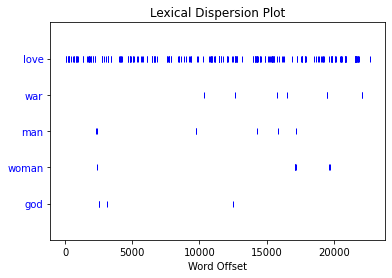

In [13]:
# dispersion plot; where do the keyword appear
text.dispersion_plot( KEYWORDS )


In [14]:
# similar words
for keyword in sorted( KEYWORDS ) :
    print( "%s" % ( keyword ) )
    text.similar( keyword )
    print()


god
canker loss man face journey bliss

love
heart thee me this name time verse mind will glass all am use thou not
for and of to you

man
canker loss god face journey bliss

war
love disgrace favour

woman


